In [1]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
# Assuming the file is already uploaded and loaded into `data`
data = pd.read_csv(r"C:\Users\pminh\OneDrive\Documents\Classes\Fall 24\STA160 DATA\merged_output.csv")
#data = data[data['City'] != 'Los Angeles']
#data = data[data['City'] != 'Long Beach']

# Step 2: Preprocess the data
# Drop unnecessary columns (e.g., 'City')
data = data.drop(columns=["City"], errors="ignore")

# Separate predictors (X) and target variable (y)
X = data.drop(columns=["Median Income"])  # Adjust the target column name if needed
y = data["Median Income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define parameter grids for Ridge and Lasso
ridge_param_grid = {"alpha": [x * 0.25 for x in range(0, 500)]}
lasso_param_grid = {"alpha": [x * 0.25 for x in range(0, 500)]}

# Ridge Regression with GridSearchCV
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, ridge_param_grid, scoring="neg_mean_squared_error", cv=5)
ridge_cv.fit(X_train_scaled, y_train)
ridge_best = Ridge(alpha=ridge_cv.best_params_["alpha"])
ridge_best.fit(X_train_scaled, y_train)
ridge_y_pred = ridge_best.predict(X_test_scaled)

# Lasso Regression with GridSearchCV
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, lasso_param_grid, scoring="neg_mean_squared_error", cv=5)
lasso_cv.fit(X_train_scaled, y_train)
lasso_best = Lasso(alpha=lasso_cv.best_params_["alpha"])
lasso_best.fit(X_train_scaled, y_train)
lasso_y_pred = lasso_best.predict(X_test_scaled)

# Evaluate Ridge
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

# Evaluate Lasso
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)


# Compare Results
print(f"Ridge - Best Alpha: {ridge_cv.best_params_['alpha']}, MSE: {ridge_mse}, R²: {ridge_r2}")
print(f"Lasso - Best Alpha: {lasso_cv.best_params_['alpha']}, MSE: {lasso_mse}, R²: {lasso_r2}")


C:\Users\pminh\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.04303e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\pminh\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.42472e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\pminh\anaconda3\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\pminh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\pminh\anaconda3\Lib\site-packages\sklearn\linear_model\

Ridge - Best Alpha: 3.75, MSE: 521446875.1020064, R²: 0.7850619008625727
Lasso - Best Alpha: 124.75, MSE: 507606721.11679864, R²: 0.7907667512152916


C:\Users\pminh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.775e+07, tolerance: 9.312e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\pminh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.055e+07, tolerance: 1.154e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\pminh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.966e+07, toleranc

In [21]:
# Create a DataFrame to compare actual and predicted values for the entire dataset
comparison_df_all = pd.DataFrame({
    "City": data["City"],  # Add city names to the DataFrame
    "Actual Median Income": y,
    "Ridge Predicted Median Income": ridge_y_pred_all,
    "Lasso Predicted Median Income": lasso_y_pred_all
})

# Display the comparison table for all cities in a formatted way
comparison_table_all = comparison_df_all.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', '#333'), ('border', '1px solid #ddd')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid #ddd')]}]
).set_properties(**{'text-align': 'center'})

# Save the table to an HTML file for easy inclusion in your paper
comparison_table_all.to_html('comparison_table_all.html')

print("Comparison table saved as 'comparison_table_all.html'")

Comparison table saved as 'comparison_table.html'


In [27]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv(r"C:\Users\pminh\OneDrive\Documents\Classes\Fall 24\STA160 DATA\merged_output.csv")
data = data.drop(columns=["City"], errors="ignore")

# Preprocess the data
X = data.drop(columns=["Median Income"])
y = data["Median Income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grids for Ridge and Lasso
ridge_param_grid = {"alpha": [x * 0.25 for x in range(0, 500)]}
lasso_param_grid = {"alpha": [x * 0.25 for x in range(0, 500)]}

# Ridge Regression with GridSearchCV
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, ridge_param_grid, scoring="neg_mean_squared_error", cv=5)
ridge_cv.fit(X_train_scaled, y_train)
ridge_best = Ridge(alpha=ridge_cv.best_params_["alpha"])
ridge_best.fit(X_train_scaled, y_train)

# Lasso Regression with GridSearchCV
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, lasso_param_grid, scoring="neg_mean_squared_error", cv=5)
lasso_cv.fit(X_train_scaled, y_train)
lasso_best = Lasso(alpha=lasso_cv.best_params_["alpha"])
lasso_best.fit(X_train_scaled, y_train)

# Scale the entire dataset
X_scaled = scaler.transform(X)

# Predict using the entire dataset
ridge_y_pred_all = ridge_best.predict(X_scaled)
lasso_y_pred_all = lasso_best.predict(X_scaled)



C:\Users\pminh\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.04303e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\pminh\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.42472e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\pminh\anaconda3\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\pminh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\pminh\anaconda3\Lib\site-packages\sklearn\linear_model\

KeyError: 'City'

In [29]:
data = pd.read_csv(r"C:\Users\pminh\OneDrive\Documents\Classes\Fall 24\STA160 DATA\merged_output.csv")

# Create a DataFrame to compare actual and predicted values for the entire dataset
comparison_df_all = pd.DataFrame({
    "City": data["City"],  # Add city names to the DataFrame
    "Actual Median Income": y,
    "Ridge Predicted Median Income": ridge_y_pred_all,
    "Lasso Predicted Median Income": lasso_y_pred_all
})

# Display the comparison table for all cities in a formatted way
comparison_table_all = comparison_df_all.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', '#333'), ('border', '1px solid #ddd')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid #ddd')]}]
).set_properties(**{'text-align': 'center'})

# Save the table to an HTML file for easy inclusion in your paper
comparison_table_all.to_html('comparison_table_all.html')

print("Comparison table saved as 'comparison_table_all.html'")

Comparison table saved as 'comparison_table_all.html'


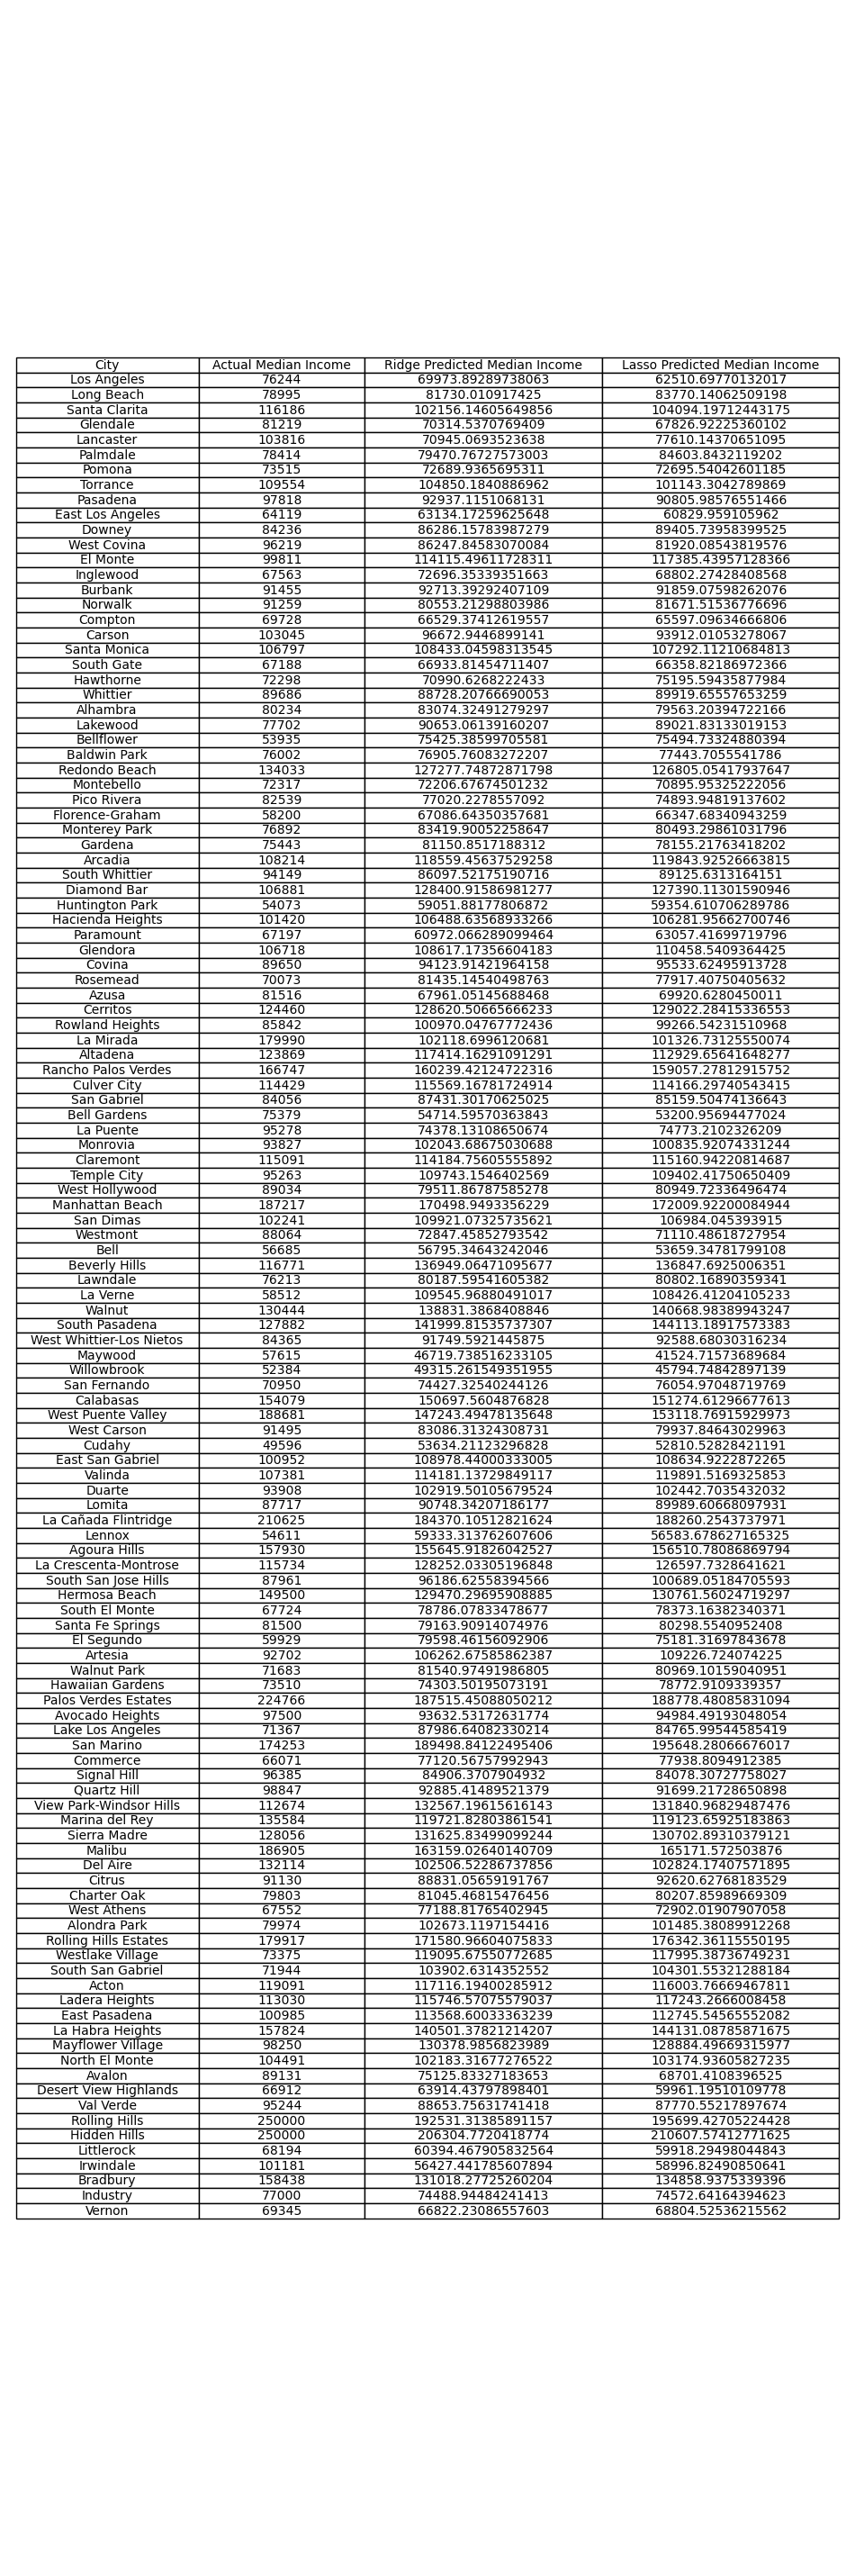

Comparison table saved as 'comparison_table_all.png'


In [31]:
comparison_df_all = pd.DataFrame({
    "City": data["City"],  # Add city names to the DataFrame
    "Actual Median Income": y,
    "Ridge Predicted Median Income": ridge_y_pred_all,
    "Lasso Predicted Median Income": lasso_y_pred_all
})

# Convert the DataFrame to an image using Matplotlib
fig, ax = plt.subplots(figsize=(12, len(comparison_df_all) * 0.3))
ax.axis('off')
ax.axis('tight')

# Convert DataFrame to Matplotlib table and save as image
table = ax.table(cellText=comparison_df_all.values,
                 colLabels=comparison_df_all.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(comparison_df_all.columns))))

plt.savefig("comparison_table_all.png", dpi=300, bbox_inches='tight')
plt.show()

print("Comparison table saved as 'comparison_table_all.png'")

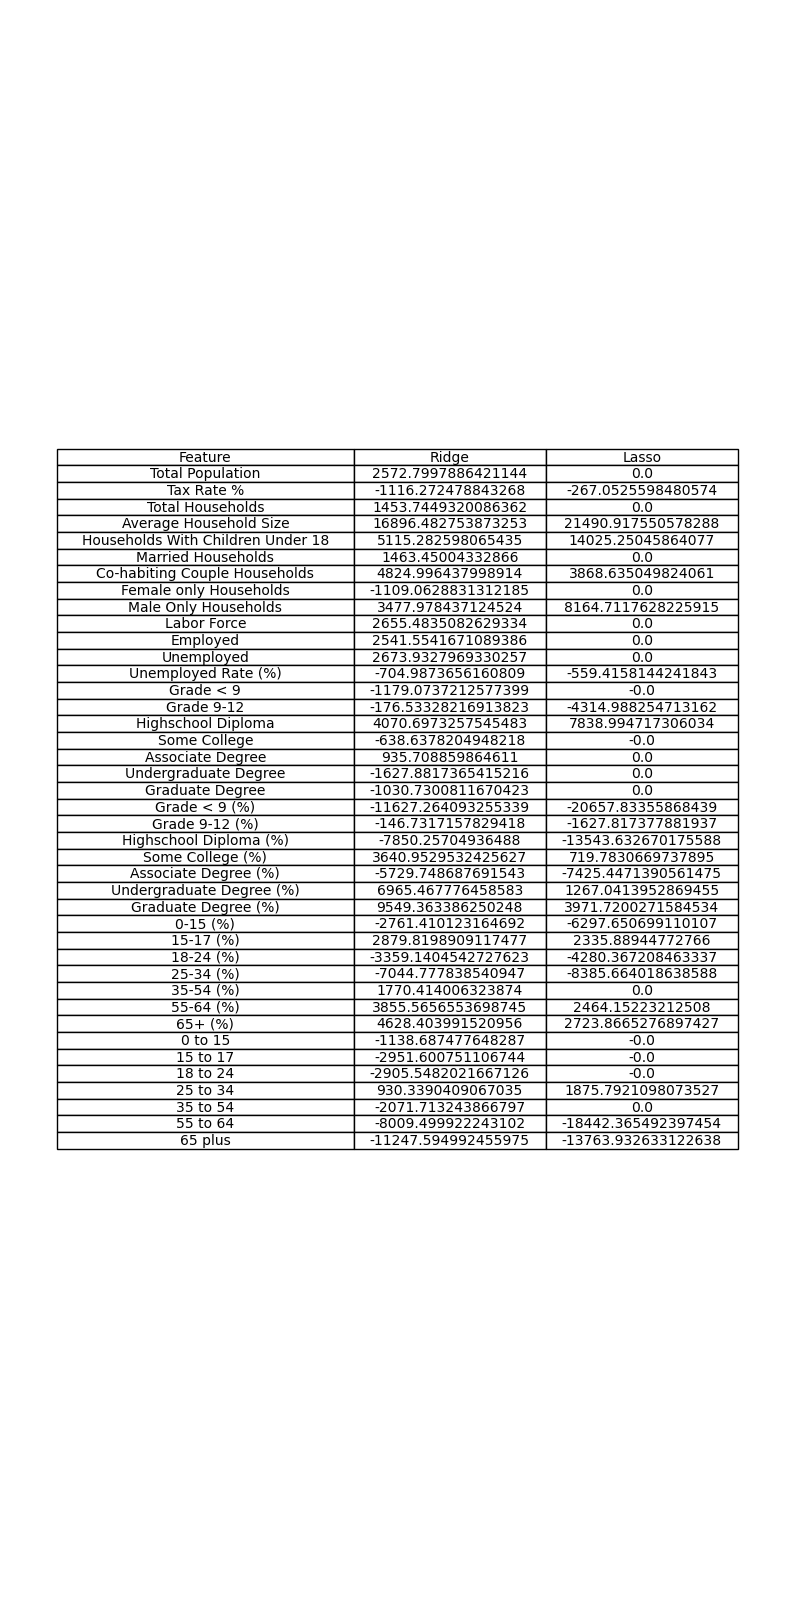

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract coefficients for Ridge and Lasso
ridge_coefficients = pd.DataFrame({
    "Feature": X.columns,  # Feature names
    "Ridge": ridge_best.coef_  # Coefficients from Ridge
})

lasso_coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Lasso": lasso_best.coef_  # Coefficients from Lasso
})

# Merge both tables
coefficients_table = pd.merge(
    ridge_coefficients, lasso_coefficients, on="Feature"
)

# Save as CSV (for further editing in Excel, optional)
coefficients_table.to_csv("coefficients_table.csv", index=False)

# Display as a styled table and save as an image
fig, ax = plt.subplots(figsize=(10, len(coefficients_table) * 0.5))
ax.axis('off')  # Hide axes
ax.axis('tight')  # Compact layout

# Convert to Matplotlib table
table = ax.table(
    cellText=coefficients_table.values,
    colLabels=coefficients_table.columns,
    cellLoc="center",
    loc="center"
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(coefficients_table.columns))))  # Adjust width

# Save the table as an image
plt.savefig("coefficients_table.png", dpi=300, bbox_inches="tight")
plt.show()


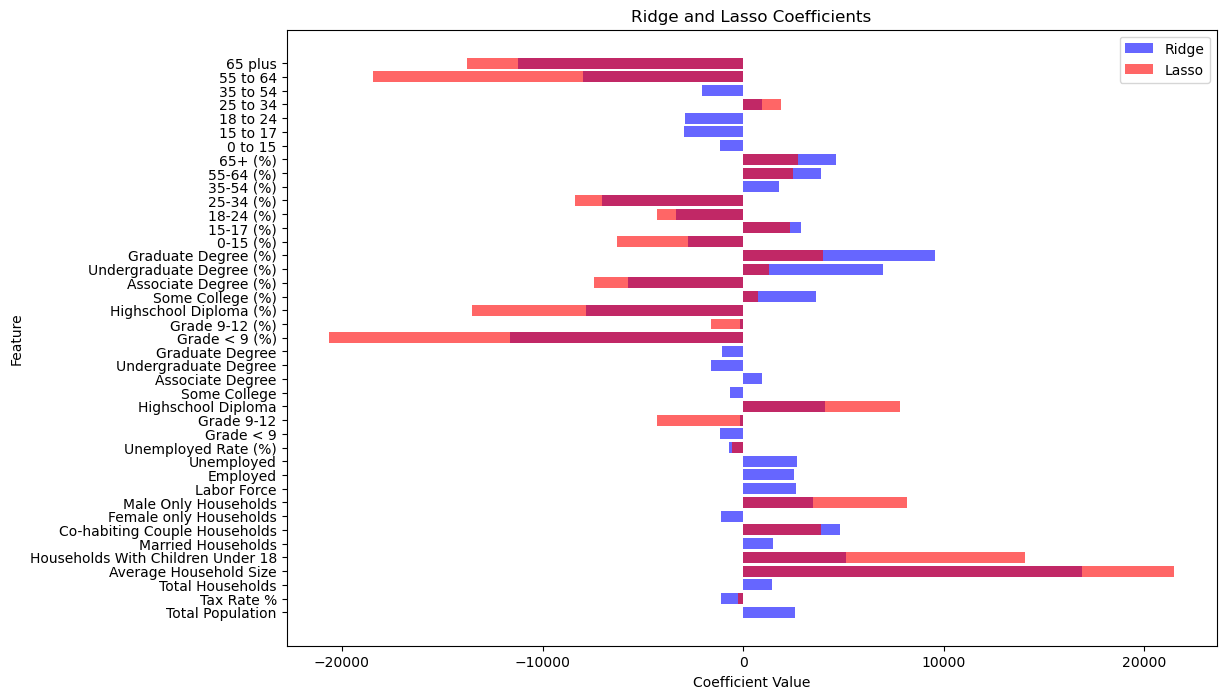

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the coefficients_table DataFrame is already created as per the provided code
# Extract coefficients for Ridge and Lasso
ridge_coefficients = pd.DataFrame({
    "Feature": X.columns,  # Feature names
    "Ridge": ridge_best.coef_  # Coefficients from Ridge
})

lasso_coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Lasso": lasso_best.coef_  # Coefficients from Lasso
})

# Merge both tables
coefficients_table = pd.merge(
    ridge_coefficients, lasso_coefficients, on="Feature"
)

# Create a vertical bar graph
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Ridge coefficients
ax.barh(coefficients_table["Feature"], coefficients_table["Ridge"], color='b', alpha=0.6, label='Ridge')

# Plot Lasso coefficients
ax.barh(coefficients_table["Feature"], coefficients_table["Lasso"], color='r', alpha=0.6, label='Lasso')

# Add labels and title
ax.set_xlabel('Coefficient Value')
ax.set_ylabel('Feature')
ax.set_title('Ridge and Lasso Coefficients')
ax.legend()

# Save the bar graph as an image
plt.savefig("coefficients_bar_graph.png", dpi=300, bbox_inches="tight")
plt.show()

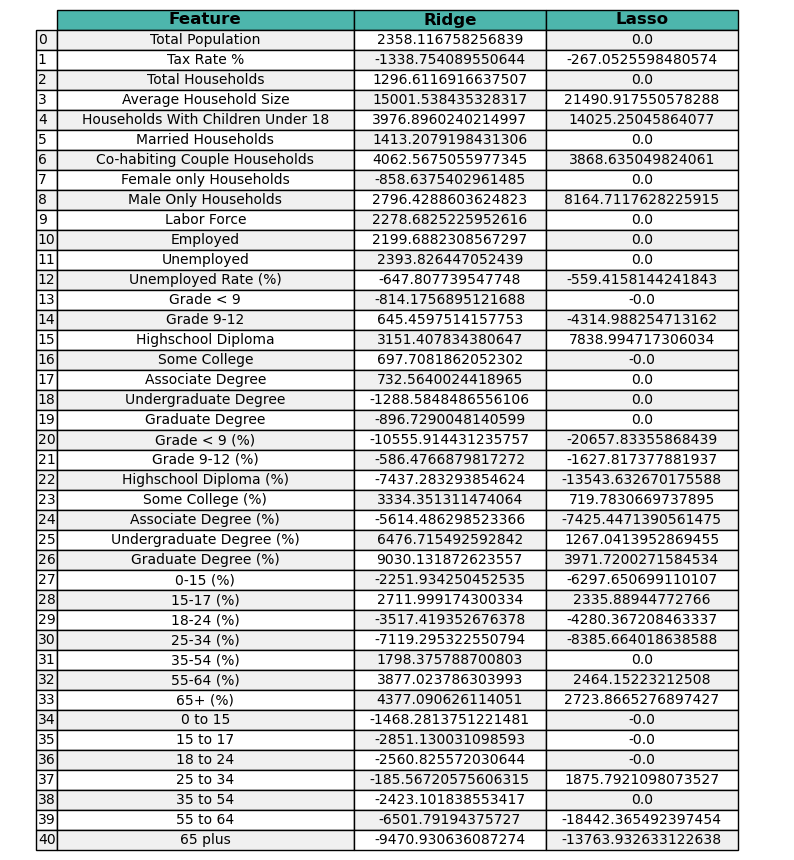

In [11]:
import matplotlib.pyplot as plt
from pandas.plotting import table

# Create a plot to hold the table
fig, ax = plt.subplots(figsize=(10, 5))  # Adjust size for clarity
ax.axis("off")  # Remove the axis

# Add the table to the plot
tbl = table(ax, coefficients_table, loc="center", cellLoc="center", colWidths=[0.2] * len(coefficients_table.columns))

# Style the table
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)  # Adjust font size
tbl.scale(1.2, 1.2)  # Scale for better readability

# Bold the column names
tbl.auto_set_column_width([0, 1, 2])  # Adjust column width
for i, key in enumerate(tbl.get_celld().keys()):
    cell = tbl.get_celld()[key]
    if key[0] == 0:  # First row (header)
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold')  # Make the header bold
        cell.set_facecolor('#4db6ac')  # Set header color (hex #4db6ac)
    else:
        cell.set_fontsize(10)
        # Alternate row colors for readability
        cell.set_facecolor('#f0f0f0' if i % 2 == 0 else 'white')

        # Highlight Lasso coefficients where they are 0
        if key[1] == 'Lasso':  # Check if the column is 'Lasso'
            try:
                # Convert the value to numeric and check if it's 0
                if pd.to_numeric(cell.get_text(), errors='coerce') == 0:
                    cell.set_facecolor('yellow')  # Highlight in yellow
            except ValueError:
                pass  # Ignore if the value cannot be converted to numeric

# Save the table as an image
plt.savefig("highlighted_coefficients_table.png", dpi=300, bbox_inches="tight")
plt.show()